# Tidak Kenal Maka Tidak Sayang

- Nama : Ferly Jeremi Purnawan Apiang
- NRP : 1973005

# Training Classifier dengan Suppor Vector Machine (SVM) Dataset Breast Cancer

Melakukan Training Classifier untuk Dataset Breast Cancer dengan classifier Support Vector Machine (SVM)

## Load Breast Cancer Dataset

Dimohon untuk menguduh terlebih dahulu dataset yang akan digunakan karena saya menggunakan Dataset yang sudah di unduh.

- Website Unduh : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [17]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


- Import Pandas untuk membuat sebuah table agar terlihat rapih
- df = pd.read_csv ("Input datasetnya") melakukan load datasetnya
- df.head() Menampilkan Data

### Dimensi Dataset Web

In [18]:
df.shape

(698, 11)

Baris yang ada dari dataset itu memiliki 698 Baris dan memiliki 11 kolom

### Last Data

In [19]:
df.tail()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


Ini merupakan penampilan 5 Data terakhir

## Dataset Dimension

In [20]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (569, 30)
Class: {0, 1}


- Pertama-tama kita panggil method *load_breast_cancer* dengan menyertakan parameter (return_X_y=True).
- Lalu selanjutnya kita panggil *X.shape* dan kita coba run.

Bisa kita lihat pada bahwa, jumlah baris pada **Breast Cancer** dataset tersebut berjumlah 569 baris dan 30 kolom.

## Training & Testing Set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (455, 30)
X_test shape (114, 30)
y_train shape (455,)
y_test shape (114,)


- Lakukan import terlebih dahulu modulnya dengan memanggil fungsi "from sklearn.model_selection import train_test_split".
- Selanjutnya kita akan memanggil "train_test_split" dengan menyertakan parameter "(X, y, test_size=0.2 (artinya 20% dari data kita akan dialokasikan untuk testing dataset, sedangkan 80% akan digunakan sebagai training dataset), random_state=2). Fungsi ini akan mengembalikan 4 buah kumpulan nilai yang perlu kita tangkap kedalam 4 variabel yaitu "X_train, X_test, y_train, dan y_test".
- Untuk selanjutnya, kita akan coba untuk menampilkan dimensi dari X_train dan X_test nya.

Hasil Untuk X_train jumlah datanya ada 455 dan untuk X_test ada 114 artinya X_train merupakan 80% dan X_test 20% dari keseluruhan dataset yang kita miliki.akan 80% dan X_test 20% dari keseluruhan dataset yang kita miliki.

## Classfication Support Vector (SVC)

In [22]:
from sklearn import svm

model = svm.SVC(kernel = 'linear',gamma = "auto",C = 0.3)

- Import modul **SVM** pada *SkLearn* dengan memanggil *from sklearn import svm*.
- Lalu *svm.SVC* dengan menyertakan parameter *(kernel = 'linear',gamma = "auto",C = 0.3)* yang ditampung ke dalam variabel *model*.

**Penjelasan tentang *kernel*, *gamma*, dan *C***
- Metode **kernel** adalah kelas algoritma untuk analisis pola.
- Parameter **gamma** menentukan jarak pengaruh sampel data tunggal atau dikatakan menyesuaikan kelengkungan batas keputusan.
- **C** menentukan penalti atau berapa banyak sampel yang boleh ditempatkan di kelas yang berbeda.

In [23]:
model.fit(X_train, y_train)

SVC(C=0.3, gamma='auto', kernel='linear')

## Prediksi
Melakukan Prediksi pada Breast Cancer Dataset.

In [24]:
y_predicted = model.predict(X_test)

Siapkan variablenya saya membuat model.predit lalu targetnya X_test ke dalam Variable y_predicted

## Evaluasi

Melakukan evaluasi SVM yang telah kita lakukan pada Breast Cancer Dataset

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.94      0.96      0.95        69

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



- Pertama kita akan mengimport modul terlebih dahulu dengan memanggigl method *from sklearn.metrics import classification_report*.
- Lalu kita tampilkan *(classification_report(y_test, y_predicted))* dengan print.

hasil evaluasi berupa nilai *precission*, *recall*, serta *f1-score* nya.

## Visualisasi Data

In [47]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

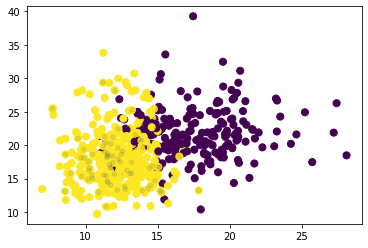

In [48]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Demikianlah cara yang saya lakukan untuk melakukan training classifier dengan menggunakan *Support Vector Machine model* pada **Breast Cancer** dataset.